In [26]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP787: Machine Learning: Classification Models
Assignment 1 - Question 2
References: 
1. Dr. Jeff Fortuna's SEP 787 Lecture Notes
2. https://scikit-learn.org/
"""


"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP787: Machine Learning: Classification Models\nAssignment 1 - Question 2\nReferences: \n1. Dr. Jeff Fortuna's SEP 787 Lecture Notes\n2. https://scikit-learn.org/\n"

**Import Libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

**Function to import dataset**

In [28]:
def import_dataset(file):
  df = pd.read_excel(file)
  len_df = len(df)
  class1 = df[df['Column58'] == 1]        #Dataset with label=1
  class2 = df[df['Column58'] == 0]        #Dataset with label=0
  X = df.iloc[:,:-1]                      #Data points
  y = df['Column58']                      #Labels      

  return [df, len_df, class1, class2, X, y]

# **Prof's Method**

**Function to obtain mean subtracted data**


In [29]:
def mean_subtracted_matrix(data):
  mean = np.mean(data, axis = 0)                                                #Mean of data points
  mean_subtracted_data = data - mean                                            #Obtain mean subtracted data
  data_submatrix = mean_subtracted_data.iloc[:,:-1]                             #Extract submatrix
  return [data_submatrix, mean]

**Function to obtain the Covariance Matrix**

In [30]:
def covariance(x):
  s = np.dot(x.T,x)                                                             #Obtains Covariance Matrix
  return s

**Function to calculate metric - Accuracy, Error and Confusion Matrix**

In [31]:
def obtain_metric(w, X, y, threshold):
  predictions = (np.sign(np.dot(w,X.T) + threshold) + 1)/2
  error = sum(predictions != y)
  accuracy = 100*(len(df)-error)/len(df)
  conf_matrix = confusion_matrix(y, predictions)
  errorIndex = np.argwhere(pd.Series.to_numpy(predictions != y))  
  # print("The error Indices are: ", errorIndex.T)                  #Too long print. Hides other outputs

  return [accuracy, error, conf_matrix]

**Function to Print Metrics**

In [32]:
def print_metric(accuracy, error, conf_matrix):
  print("\nThe percentage of data that is classified incorrectly is: \n", error*100/len(df))
  print("\nThe confusion matrix is: \n", conf_matrix)
  print("\nNo. of misclassified data points whose actual class is 1 is: ", conf_matrix[1][0])
  print("No. of misclassified data points whose actual class is 0 is: ", conf_matrix[0][1])
  print("Accuracy: ", accuracy)


**Function to obtain optimum threshold**

In [33]:
def optimum_threshold(w, X, y):
  threshold_list = np.arange(-0.01, 0.01, 0.0005)
  accuracy_list = []
  
  for threshold in threshold_list:
    [accuracy, error, conf_matrix] = obtain_metric(w, X, y, threshold)
    accuracy_list.append(accuracy)
    
  plt.plot(threshold_list, accuracy_list)
  plt.xlabel("Threshold")
  plt.ylabel("Accuracy")
  plt.show()
  
  index = accuracy_list.index(max(accuracy_list))
  optimum_threshold = threshold_list[index]
  print("Max accuracy is: ", max(accuracy_list))
  print("Optimal threshold is: ", optimum_threshold)

  return optimum_threshold

# **Main Function**

Results with threshold=0


The percentage of data that is classified incorrectly is: 
 18.3

The confusion matrix is: 
 [[319 181]
 [  2 498]]

No. of misclassified data points whose actual class is 1 is:  2
No. of misclassified data points whose actual class is 0 is:  181
Accuracy:  81.7

Calculating the optimum threshold



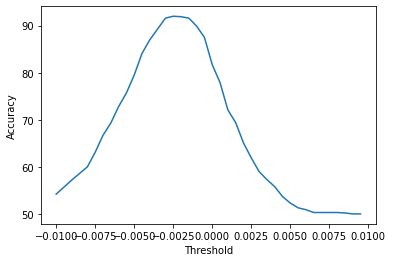

Max accuracy is:  92.0
Optimal threshold is:  -0.0024999999999999935

Results with optimum threshold


The percentage of data that is classified incorrectly is: 
 8.0

The confusion matrix is: 
 [[458  42]
 [ 38 462]]

No. of misclassified data points whose actual class is 1 is:  38
No. of misclassified data points whose actual class is 0 is:  42
Accuracy:  92.0


In [34]:
[df, len_df, class1, class2, X, y] = import_dataset('spam.xlsx')                #Import Dataset

[x1mc, mean1] = mean_subtracted_matrix(class1)
[x2mc, mean2] = mean_subtracted_matrix(class2)
S1 = covariance(x1mc)
S2 = covariance(x2mc)

Sw = S1+S2                                                                      

w = np.dot(np.linalg.inv(Sw), (mean1 - mean2)[0:57])                            #Obtain FLD's weights
# print("Weights are:", w)

print("Results with threshold=0\n")
threshold = 0                                                                   #Results with threshold = 0
[accuracy, error, conf_matrix] = obtain_metric(w, X, y, threshold)
print_metric(accuracy, error, conf_matrix)

print("\nCalculating the optimum threshold\n")
optimum_threshold = optimum_threshold(w,X,y)                                    #Results with optimum threshold

print("\nResults with optimum threshold\n")
[accuracy, error, conf_matrix] = obtain_metric(w, X, y, optimum_threshold)
print_metric(accuracy, error, conf_matrix)


# **sklearn method**

In [35]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

w = clf.coef_[0]                        #Returns the weights for the 2 axis (i.e w = [a b] in ax1 + bx2 + c = 0)
c = clf.intercept_[0]                   #Returns the threshold (i.e c in ax1 + bx2 + c = 0)

**Obtain Threshold from sklearn**

In [36]:
threshold = clf.intercept_[0] 
# print("Sklearn's weights are: ", w)
print("Sklearn's threshold is: ", threshold)

Sklearn's threshold is:  -2.550843568413452


**Metrics - Accuracy, Error, Confusion Matrix**

In [37]:
pred_y = clf.predict(X)
accuracy = accuracy_score(y,pred_y)
error = 1-accuracy
conf_matrix = confusion_matrix(y, pred_y)
errorIndex = np.argwhere(pd.Series.to_numpy(pred_y != y))  
print("The error Indices are: ", errorIndex.T)

print("The percentage of data that is classified incorrectly is: ", error*100)
print("\nThe confusion matrix is: \n", conf_matrix)
print("\nNo. of misclassified data points whose actual class is 1 is: ", conf_matrix[1][0])
print("No. of misclassified data points whose actual class is 0 is: ", conf_matrix[0][1])
print("Accuracy is: ", accuracy*100)

The error Indices are:  [[ 20  24  26  30  57  60  84  89 109 111 113 184 195 216 217 233 235 236
  250 272 294 306 308 321 323 324 325 333 347 351 375 391 395 407 444 460
  464 468 478 482 496 500 509 520 527 530 540 548 549 573 574 587 611 618
  625 628 653 661 671 672 685 700 741 755 762 772 776 781 800 809 824 868
  890 915 925 944 946 980 991 992 993 999]]
The percentage of data that is classified incorrectly is:  8.199999999999996

The confusion matrix is: 
 [[459  41]
 [ 41 459]]

No. of misclassified data points whose actual class is 1 is:  41
No. of misclassified data points whose actual class is 0 is:  41
Accuracy is:  91.8
